# Week02 - Hypothesis testing, Power analysis, ANOVA, T-test # 

### Recommended reading ###

McDonald, J.H. 2014. Handbook of Biological Statistics (3rd ed.). Sparky House Publishing, Baltimore, Maryland. Freely available online at [www.biostathandbook.com](www.biostathandbook.com)

## Hypothesis testing ##

What is a hypothesis?
* A starting point for investigation
* A statement that can be disproven with data

Four basic elements of a statistical test:
1. Null Hypothesis $ H_0 $
2. Alternate hypothesis $H_a$
3. Test statistic
4. Region of rejection for the null hypothesis

#### 1. Null Hypothesis $H_o$

_Example:_

In a calibration bath measuring temperature,

$x$ - A set of sensor measurements, error prone

$ \mu $ - Calibration bath temperature, known to many more significant digits than the sensitivity of the sensor being calibrated (for temperature calibration, the well-defined triple point of gallium is used as a reference point)

For this example, the null hypothesis is

$ H_0: \bar{x} = \mu $.

#### 2. Alternate hypothesis $H_a$

The alternate hypothesis must cover all possibilities not covered by the null hypothesis. The probability of either the null hypothesis of alternate hypothesis must sum to 1, and they must be mutually exclusive. 

For the calibration bath example described above,

$ H_a: \bar{x} \neq \mu $.

#### 3. Test statistic

The test statistic can either be __parametric__ or __non-parametric__. Parametric tests are based on theoretical probability distributions, such as the normal distribution. Non-parametric tests do not assume a particular distribution, but are often less efficient or sacrifice statistical power (see below).

For the calibration bath example, the appropriate statistical test is the one sample t-test. This is because we are comparing one group of samples (sensor measurements) to a known value (calibration bath temperature). We also expect the sensor measurements to be normally distributed.

For a normally distributed parent population the _t-statistic_,

$ t = \frac{ \bar{x} - \mu } {s\sqrt{\frac{1}{N}}} $,

has a known distribution. If $N$ samples are taken from the population many many times, the resulting t-statistics will follow a probability distribution called the t-distribution (see notes from [Week 01](week01-probability_and_distributions.ipynb)). 

#### 4.  Region of rejection of the null hypothesis

In order decide whether to accept or reject the null hypothesis, we must define what constitutes an "extreme" value of the test statistic. 

For a group of $N$ = 4 samples (3 degrees of freedom) taken randomly from a normal distribution, there is 5% chance that the t-statistic will be either greater than 3.18 or less than -3.18. This defines the rejection region for a 95% confidence level. In this case, $\alpha = $ 0.05 is the probability that the null hypothesis will be wrongly rejected based on $N$ samples, _if the null hypothesis is true_. Conversely, there is a 95% probability that the null hypothesis will be correctly accepted, _if it the null hypothesis is true_, which in general is not known.

<IPython.core.display.Javascript object>


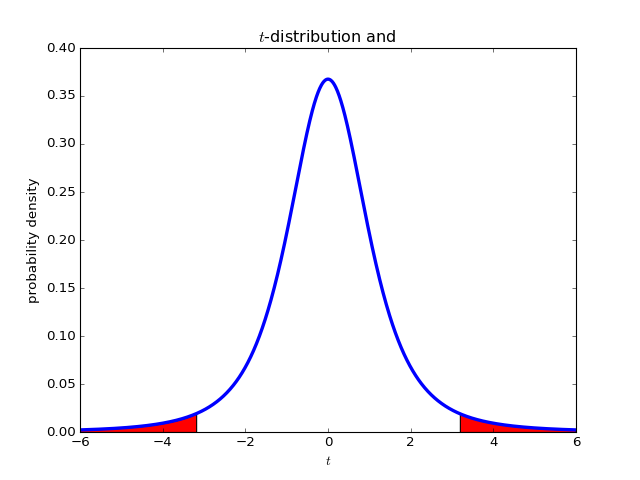

In [2]:
%matplotlib notebook
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt

# number of samples
N = 4
alpha = 0.05

# plot t-distribution
tvalues = np.arange(-6,6,0.01)
tpdf = stats.t.pdf(tvalues,N-1)

plt.figure()
plt.plot(tvalues,tpdf,lw=3)
plt.xlabel('$t$')
plt.ylabel('probability density')
plt.title('$t$-distribution and ')

# plot rejection regions
tcrit = stats.t.ppf(1-alpha/2,N-1)
upperi, = np.where(tvalues>tcrit)
loweri, = np.where(tvalues<-tcrit)
plt.fill_between(tvalues[upperi],tpdf[upperi],facecolor='red')
plt.fill_between(tvalues[loweri],tpdf[loweri],facecolor='red')

In Python, the upper and lower critical values of a test statistic can be found by selecting a distribution from the `stats` library (`stats.t` in this case) and using the `ppf` function.

In [3]:
alpha = 0.05
N = 4
tupper = stats.t.ppf(1-alpha/2,N-1)
tlower = stats.t.ppf(alpha/2,N-1)
print('upper critical t value = '+str(tupper))
print('lower critical t value = '+str(tlower))

upper critical t value = 3.18244630528
lower critical t value = -3.18244630528


The probability of obtaining a certain $t$ value or less can be found from the cumulative distribution function, `cdf`.

In [4]:
stats.t.cdf(tupper,N-1)

0.97500000000001064

In testing a null hypothesis, there are four possible situations, depending on the actual truth of the null hypothesis, and the conclusion that is drawn from a test statistic calculated from a finite number of samples.

|                          | Null hypothesis is `True` | Null hypothesis is `False` |
| ------------------------ | ------------------------- | -------------------------- |
| Null hypothesis accepted |(1-$\alpha$) probability of correct decision|$\beta$ probability of incorrect decision|
| Null hypothesis rejected |$\alpha$ probability of incorrect decision|(1-$\beta$) probability of correct decision|

Here, $(1-\alpha)$ is called the "confidence level" and $(1-\beta)$ is called the "statistical power". $\alpha$ is the probability of making a __Type I error__ and $\beta$ is the probability of making a __Type II error__.

Some version of this table is presented in nearly every textbook on statistics. However, it still leads to a lot of confusion. 

Let's say you are comparing a set of observations to a theory, or a set of sensor values with a known standard. In truth, there is almost certainly a difference between the sample mean and the true mean, say to 20+ significant digits. But, if the data are noisy it would still be difficult to _prove_ that this small difference did not just occur by random chance. Failing to reject the null hypothesis at a 95% confidence level does not mean that you are 95% certain that it is true. It just means that your data are less extreme than 95% of random groups of samples drawn from the hypothesized distribution.

Scientists tend to focus on confidence intervals rather than statistical power because this approach is conservative from a scientific point of view. By avoiding Type I errors, scientists reduce the likelihood of promoting an idea that is not actually true. This may come at the price of not detecting actual differences. However, as explained, power analysis can be an extremely valuable tool for planning experiments and determining how many samples you need. 

Power analysis is described later in these notes, after covering the basic statistical procedure of t-tests.

## Student's t-test

The $t$-statistic is used to test whether sample means are different. It was was used by a statistician named William Sealy Gosset, who worked for the Guiness Brewery in Dublin in the early 20th century. He was interested in comparing the properties of ingredients of the beloved Irish stout with a small number of samples. To keep his corporate boss happy, Gosset published his statistical work under the pseudonym "Student". 

### One-sample t-test

The example described above, in which a sample mean is compared with a single value (possibly a known value or a theoretical result), is called a __one-sample t-test__. 

In Python, a one sample $t$-test can be conducted with the function `stats.ttest_1samp()`. Given a set of values `x` and a population mean, $\mu$ or `popmean`, this function returns the $t$-statistic and a $p$-value. The $p$-value is the probability of obtaining a $t$-statistic of that magnitude, or more extreme if the null hypothesis is true. If the $p$-value is less than $\alpha$ then the null hypothesis can be rejected.

Looking at an example where we have three samples, and a population mean $\mu$ = 10.0

In [5]:
x = [1.,2.,4.]  # list of samples,
popmean = 10.0  # population mean (true mean)
t,p = stats.ttest_1samp(x, popmean)  
print("x:",x)
print("mu:",popmean)
print("t:",round(t,3))
print("p:",round(p,3)) 

x: [1.0, 2.0, 4.0]
mu: 10.0
t: -8.693
p: 0.013


In this case, the $p$-value is less than .05 but greater than 0.01, so can the null hypothesis can be rejected at the at 95% confidence level but not the 99% confidence level.

Looking at another example where the population mean is closer to the sample mean,

In [6]:
a = [1,2.,4]
popmean = 3
t,p = stats.ttest_1samp(a, popmean)
print("x:",x)
print("mu:",popmean)
print("t:",round(t,3))
print("p:",round(p,3))

x: [1.0, 2.0, 4.0]
mu: 3
t: -0.756
p: 0.529


we see that the $t$-statistic is much closer to zero, and the $p$-value is is much higher. In this case, the null hypothesis cannot be rejected at the 95% confidence level (or even a far more lenient 60% confidence level). 

The p-value is related to the cumulative probability of the t-statistic. The p-value is the probability of obtaining a certain value of t, or more extreme. The cumulative probability is the probability of obtaining a certain value of t or less when taking random samples from a normal distribution. 

In [17]:
tcdf = stats.t.cdf(-0.756,2)
print("cumulative probability:",round(tcdf,3))

cumulative probability: 0.264


There is a probability of 0.264 of randomly obtaining $t$ value of -0.756 or less. However, there is twice as much probability (p = 0.529) of obtaining a more extreme value ($t \leq $ -0.756 _or_ $t \geq $ -0.756).

### One-tailed vs. two-tailed tests

The two previous examples are both __two-tailed__ tests. The rejection region occupies both tails of the t-distribution. In a one tailed test, we only care about differences in a certain direction, for example:

$ H_0: \bar{x} \leq \mu $

$ H_a: \bar{x} > \mu $

In this case, the null hypothesis is rejected only for extreme t values that are greater than zero. The rejection region for the 95% confidence level is shown below for $N$ = 4 samples (3 degrees of freedom).

<IPython.core.display.Javascript object>


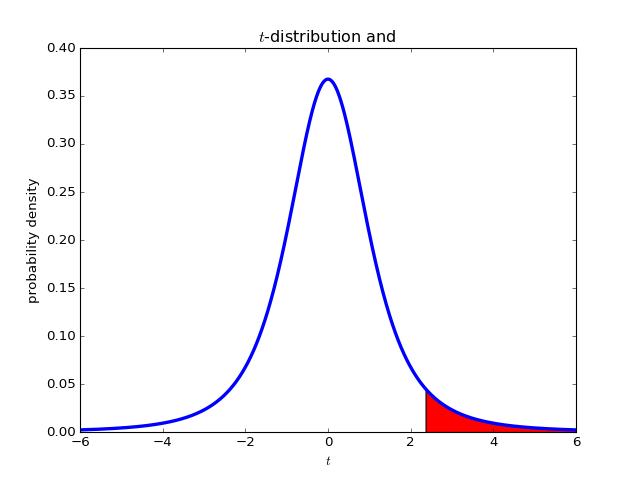

In [9]:
plt.figure()
plt.plot(tvalues,tpdf,lw=3)
plt.xlabel('$t$')
plt.ylabel('probability density')
plt.title('$t$-distribution and ')

# plot rejection regions
tcrit = stats.t.ppf(1-alpha,N-1)
upperi, = np.where(tvalues>tcrit)
plt.fill_between(tvalues[upperi],tpdf[upperi],facecolor='red')

When using a function such as `stats.ttest_1samp()` to do a one-tailed test, here is how to interpret the output:

* Reject $H_o$ only if the value of t has the correct sign
* If t does have the correct sign, reject H_o if __1/2 the p-value__ is less than $\alpha$

### Two-sample t-test: comparing pairs of populations

A __two-sample t-test__ is used to test whether the means of two groups of samples are different.

$H_o: \bar{x_1} = \bar{x_2}$

$H_a: \bar{x_1} \neq \bar{x_2}$

The example below shows bacterial growth rates for two different sets of samples. The control is from a sample collected from an estuary and "GX" is from an experiment in which a polysaccharide compound (gum xantham) was added to invesitgate the effects of tranparent exopolymer particles (TEP).

<img src='images/t_test_ex.png' width ='400'>

_Source:_ Bar-Zeev and Rahav (2015) Microbial metabolism of transparent exopolymer particles during the summer months along a eutrophic estuary, Front. Microbiol.
http://journal.frontiersin.org/article/10.3389/fmicb.2015.00403/full

Box Plots:
* Central line represents median
* Box brackets 25-75th percentile (50% of the data)
* Whiskers bracket 10-90th percentile (80% of the data)

The $*$ above the second box indicates a significant difference as indicated by a t-test. There is overlap in the range of growth rates, but the null hypothesis that the means are equal is rejected at a 99% confidence level.

#### Student's two- sample t-test (equal variances)
A two-sample t-test is used to comparing $\bar{x}$ and $\bar{y}$, _assuming populations being sampled have the same true variance_, i.e.  $\sigma_x^2 = \sigma_y^2 $. With $N_x$ and $N_y$ samples, the t statistic is given by:

$ t = \frac{\bar{x} - \bar{y}} {s_{xy} \sqrt{\frac{1}{N_x} + \frac{1}{N_y} }} $,

where $s_{xy}$ is the pooled sample variance,

$ s_{xy} = \sqrt{\frac{(N_x - 1)s_x^2 + (N_y - 1)s_y^2} {N_x + N_y -2}  } $,

and the degrees of freedom is given by

$\nu = N_x + N_y -2$.

__Note:__ For paired samples that are not independent, you would not use this test. Instead, you would take the differences and use a one-sample t-test as described above. This would have $N-1$ degrees of freedom for $N$ pairs.

#### Welch's two sample t-test (unequal variances)

Welch's t-test is more robust and does not assume equal variances of $x$ and $y$. The t statistic is given by 

$ t = \frac{\bar{x} - \bar{y}} {\sqrt{\frac{s_x^2}{N_x} + \frac{s_y^2}{N_y} }} $.

The degrees of freedom in this case is a more complicated expression given by the Welch-Satterthwaite equation:

$\nu = \frac{\left(\frac{s_x^2}{N_x} + \frac{s_y^2}{N_y}\right)^2}{\frac{1}{(N_x-1)}\left(\frac{s_x^2}{N_x}\right)^2 + \frac{1}{(N_y-1)}\left(\frac{s_y^2}{N_y}\right)^2}$

####  Python implementation

For arrays of independent values `x` and `y`, the __Student's t-test__ can be performed using this function:

`t,p = stats.ttest_ind(x,y)`

For __Welch's t-test__, use the same function but set the `equal_var` option to `False`.

`t,p = stats.ttest_ind(x,y,equal_var=False)`

It is recommended to use Welch's t-test unless you have a good reason to assume that the population variances are equal. This reduces the chance of a Type I error.

#### Exercise: comparing means of current meter data

In Section 3.14 of Emery and Thomson, an example is given where the January means of alongshore velocity ($V$) from current meter data are compared for two different years. The means and standard deviations from daily averages in January are given by

Year 1: $\bar{V_1} = 23 \pm 3 \text{ cm/s}$

Year 2: $\bar{V_2} = 20 \pm 2 \text{ cm/s}$

Perform a Student's t-test to test the null hypothesis that the means are the same between these two years, for 95% confidence. You may assume that each daily average is an independent sample.

## Power analysis

Statistical power describes the probability of correctly accepting the null hypothesis, if it is false. A conventional target power is $(1 -  \beta) = 0.8$. This means that if the null hypothesis is false, there is a probability $\beta$ = 0.2 (one out of five chance) that the null hypothesis will be accepted incorrectly (Type II error). This would mean incorrectly inferring that there is no difference between two sets of samples.

Statistical power and confidence levels are not independent. The confidence level for accepting or rejecting a null hypothesis is one of the primary factors that determined statistical power.

Power analysis can be useful for studies that inform management decisions, in which avoiding a Type II error might be a "conservative" action. For example, a Type II error in a study on the effect of pollution on abundance of an organism at two sites (pristine and disturbed) might mean "incorrectly" protecting habitat. The accepted level of risk of a Type II error in this case might vary between environmental and industry stakeholders.

Power analysis is also useful _before_ conducting an experiment. It can help you determine how many samples you need to observe a certain effect with a statistical test. The effect that you want to observe might be determined by the resolution of your instrument, or what you think might be important in an ecological sense. Remember that determining a significant difference between two sets of samples does not mean that the difference is important.

There are four ingredients in a power analysis. If three are known, than the fourth can be calculated.

* Effect Size: $d = \frac{|\mu_1 - \mu_2 |} {\sigma} $
    * d=0.2 "small"
    * d=0.8 "large"
* Sample size: $N$
* Confidence Level: (1-$\alpha$)
* Target Power: (1-$\beta$)

#### Resources for calculating power

Online visualization (for one-sample z-test only):

http://rpsychologist.com/d3/NHST/


Online power calculator (for many different statistical tests):

http://webpower.psychstat.org/wiki/

G* power:

http://www.gpower.hhu.de/en.html

Python http://jpktd.blogspot.com/2013/03/statistical-power-in-statsmodels.html

#### Example: detecting small differences with a noisy instrument 
* Want to be able to measure a differences of 2 $\mu$M
* instrument noise = 5 $\mu$M
* Significance level: $\alpha$ = 0.05
* Power: 1- $\beta$ = 0.8

_How many of samples do we need to detect this difference?_

In this case, the effect size can be thought of as the absolute difference of 2uM, relative to the standard deviation (noise level) of 5uM. The effect size $d = $ 0.4.

In [25]:
from statsmodels.stats import power
nobs = power.tt_solve_power(power=0.8,alpha=0.05,effect_size=0.4)
print('N = ',round(nobs,3))

N =  51.009


If the actual difference is 2uM, then we will get a significant difference 80% of the time with $N = $ 51. This example is for a one-sample t-test, but other functions in the `power` library can be used for other statistical tests.

In [26]:
dir(power) # List all the functions in the power library 

['FTestAnovaPower',
 'FTestPower',
 'GofChisquarePower',
 'NormalIndPower',
 'Power',
 'TTestIndPower',
 'TTestPower',
 '_GofChisquareIndPower',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'brentq_expanding',
 'ftest_anova_power',
 'ftest_power',
 'iteritems',
 'normal_power',
 'np',
 'optimize',
 'print_function',
 'stats',
 'tt_ind_solve_power',
 'tt_solve_power',
 'ttest_power',
 'zt_ind_solve_power']

## ANOVA ##
__ Analysis of variance __: test for a statistically significant difference between means of 3+ different groups

* Does not tell you which group is different
* Requires the use of __*post hoc*__ analysis to determine which means are different from each other

Example:
<img src='images/anova_example.png' width = '600'> http://www.biostathandbook.com/onewayanova.html

__One-Way ANOVA__ 
Fisher's LSD *post-hoc* test used to determine which populations are different from each other.

__Two-Way ANOVA__
Data are grouped into different genotypes, within those groupings, sex is segregated. Thus two factors are varying across the examples



One-Way example:

* J Populations (or "treatments")
* N samples per population
* $H_0: \mu_1 = \mu_2 = \mu_3 = \mu_4 $
* $H_a$: One mean will be different from any of the others

Three different types of CTDs in a water bath, each has four different measurements
( Does not require the same number of samples within each population

Use the F-statistic: The ratio of the variances of two groups of samples taken from a normal distribution follows an *F* distribution

$$ F = \frac{s_1^2}{s_2^2} $$

The F distribution can be used to test whether variances are  significantly different. In the case of ANOVA, we want to test whether the variance of differences between different groups is larger than the variance within groups.

Sum of Squares Between: __SSB__ $$\sum_{j=1}^J{N_j(\bar{y_j}-\bar{y})^2}$$where $\bar{y_j}$ is the mean of each population and $\bar{y}$ is the mean of all samples

Mean Square Between: __MSB__ $$\frac{SSB}{J-1}$$

$J-1$ is the degrees of freedom in calculating MSB.

Sum of Squares Within: __SSW__ $$ \sum_{j=1}^J{\sum_{i=1}^{N_j}}({y_{ij}} - \bar{y}_i)^2  $$

Mean Square Within: __MSW__ $$ \frac{SSW} {\sum_{j=1}^J ({ N_j} -J )} $$

$\sum_{j=1}^J ({ N_j} -J )$ is the degrees of freedom in calculating MSW. This is the total number of samples minus the number of groups.

F-Distribution: __F__ $$ =\frac{MSB}{MSW} $$


The null hypothesis can be rejected if F is large. This is a one-tailed test, since small values of F do not lead to a rejection of the null hypothesis. The region of rejection is is above some critical level, which is determined by the confidence level and the degrees of freedon in the numerator and denominator.


### Popular *post-hoc* tests ###

* Fisher's LSD (least significant difference)

* Tukey HSD (honest significant difference) 
